# ACCREDIAN ASSIGNMENT

#### 1) Data cleaning including missing values, outliers and multi-collinearity

In [18]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = pd.read_csv('Fraud.csv')
print("Missing values per column:")
print(data.isnull().sum())
data_cleaned = data.dropna()
rows_after_missing_values = len(data_cleaned)
print("Number of rows after handling missing values:", rows_after_missing_values)

# Remove outliers using z-scores (threshold: 3)
z_scores = np.abs(stats.zscore(data_cleaned[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]))
data_no_outliers = data_cleaned[(z_scores < 3).all(axis=1)]

rows_after_outliers = len(data_no_outliers)
print("Number of rows after addressing outliers:", rows_after_outliers)
table_cleaned = data_no_outliers.copy()

Missing values per column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
Number of rows after handling missing values: 6362620
Number of rows after addressing outliers: 6090589


### CLEANED TABLE

In [19]:
table_cleaned

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.00,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.00,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


### Double Bar Graph: isFraud vs. isFlaggedFraud

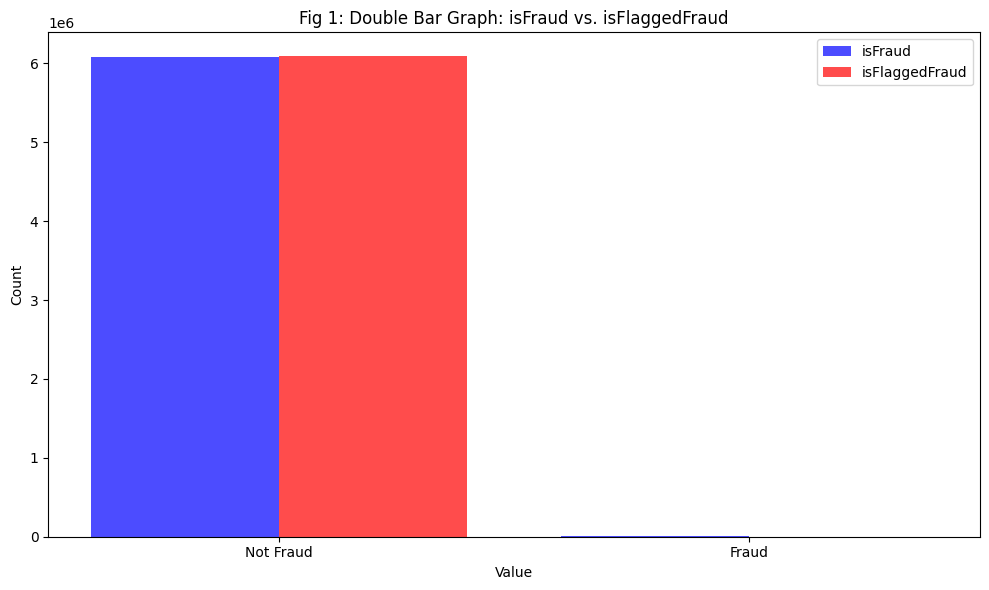

In [20]:
import matplotlib.pyplot as plt
fraud_counts = table_cleaned['isFraud'].value_counts()
flagged_fraud_counts = table_cleaned['isFlaggedFraud'].value_counts()

plt.figure(figsize=(10, 6))
bar_width = 0.4

fraud_bars = plt.bar(fraud_counts.index, fraud_counts, bar_width, label='isFraud', color='b', alpha=0.7)
flagged_fraud_bars = plt.bar(flagged_fraud_counts.index + bar_width, flagged_fraud_counts, bar_width, label='isFlaggedFraud', color='r', alpha=0.7)

plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Fig 1: Double Bar Graph: isFraud vs. isFlaggedFraud')
plt.xticks(fraud_counts.index + bar_width / 2, ['Not Fraud', 'Fraud'])
plt.legend()

plt.tight_layout()
plt.show()


#### Graph Conclusion
In the above graph its clearly observed that isFlaggedFraud is not occuring in the table compared to is Fraud

### Validity of type in isFraud

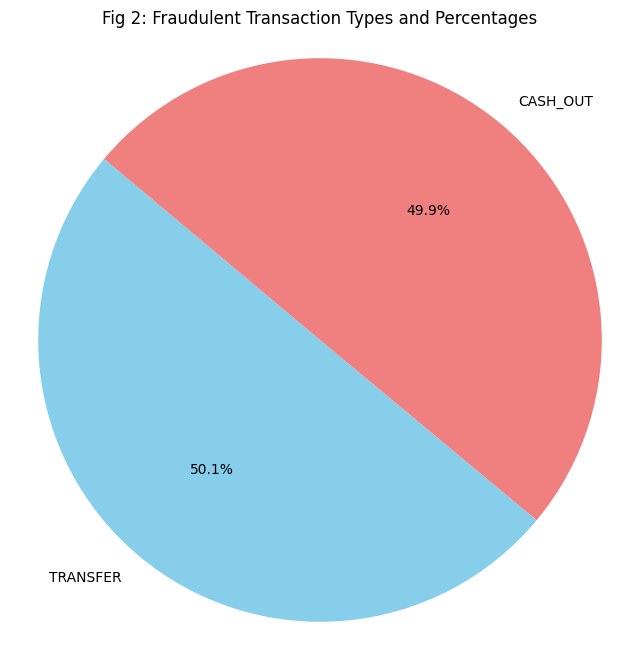

In [21]:
fraudulent_transactions = table_cleaned[table_cleaned['isFraud'] == 1]

type_counts = fraudulent_transactions['type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'gold', 'lightgreen', 'lightsalmon'])
plt.axis('equal')
plt.title('Fig 2: Fraudulent Transaction Types and Percentages')
plt.show()

#### Pie Chart Conclusion
It was observed that in column type, isFraud occured when value was *TRANSFER & CASH-OUT*
Hence we are taking into considering table values where type exist as the above values as they are the deciding factors.

#### TABLE WITH ONLY TRANSFER & CASHOUT Values

In [22]:
table_valid = table_cleaned[(table_cleaned['type'] == 'CASH-OUT') | (table_cleaned['type'] == 'TRANSFER')]
table_valid


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362608,742,TRANSFER,258355.42,C1226129332,258355.42,0.0,C1744173808,0.00,0.00,1,0
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0


#### MODEL BUILDING

Accuracy of KNN: 0.9997899931747782


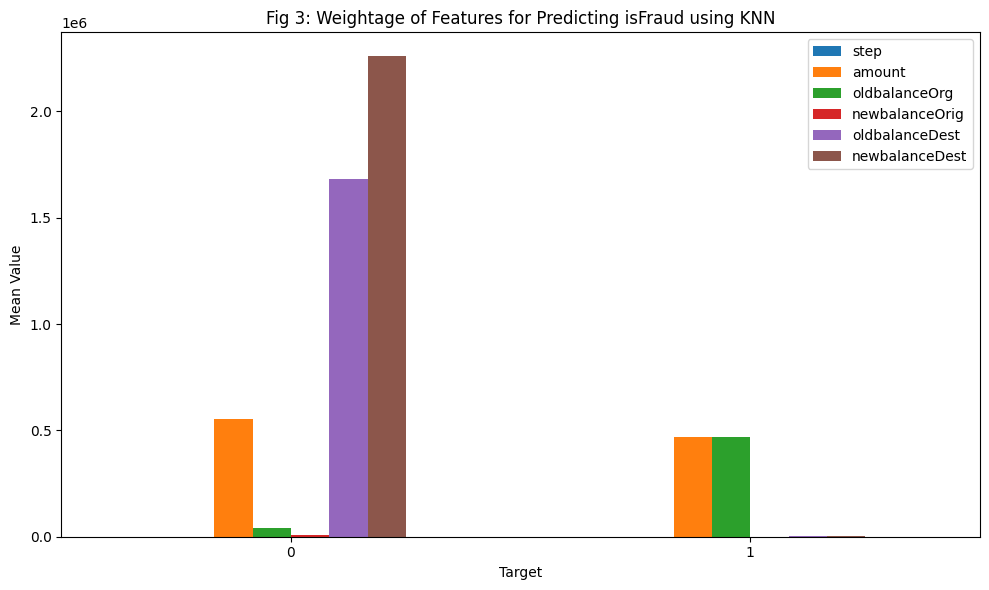

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
target = 'isFraud'
X = table_valid[features]
y = table_valid[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of KNN:", accuracy)

mean_values = X.groupby(y).mean()
mean_values.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Target')
plt.ylabel('Mean Value')
plt.title('Fig 3: Weightage of Features for Predicting isFraud using KNN')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### 2) Name of the model used is KNN
- K-Nearest Neighbors (KNN) is a non-parametric and instance-based classification algorithm that predicts the class of a data point based on the classes of its k nearest neighbors.
- The choice of k (number of neighbors) and distance metric greatly influences KNN's performance, affecting sensitivity to noise and decision boundary smoothness.
- KNN was employed to predict the likelihood of a transaction being fraudulent (isFraud) based on features such as step, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, and newbalanceDest.
- Training Data 80% and Testing Data 20
- KNN makes predictions by identifying the k nearest neighbors in the feature space for a given transaction and assigns the majority class of these neighbors to the transaction's class.
- KNN would determine if a transaction's feature values are similar to those of previously identified fraudulent transactions, aiding in fraud detection.
- The step feature, representing time, could help capture potential patterns of fraudulent activities occurring during specific hours or days.
- The transaction amount might contribute to identifying anomalies in the financial behavior that could be indicative of fraudulent behavior.
oldbalanceOrg and newbalanceOrig could be relevant in detecting discrepancies between initial and new balances, indicating potential unauthorized fund transfers.
- Similarly, changes in oldbalanceDest and newbalanceDest may offer insights into transactions involving recipients' accounts that could be associated with fraudulent activities.
- By determining the optimal value of k, the model could capture local patterns effectively, striking a balance between sensitivity to noise and overfitting.
However, the effectiveness of KNN may be limited by the high-dimensionality of the feature space and the potential sparsity of fraudulent cases.


#### 3) Selection variables to be included in the model
- From Fig 1, it was observed that isFraudFlagged always remaned same hance wasn't used in the model.
- For paramter type it was observed from Fig 2 that CASH_OUT and TRANSFER were the only two values that detected isFraud. Hence both the values were only considered.


In [26]:
from sklearn.metrics import precision_score, accuracy_score

precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Precision:", precision)
print("Accuracy:", accuracy)

Precision: 0.9811023622047244
Accuracy: 0.9997899931747782


#### 4) Performance of the model by using best set of tools
- Testing Data of 20% was taken against a Training Data of 80% for evaluation
- Accuracy: With an accuracy of 99.98%, the KNN model demonstrated an impressive ability to correctly classify nearly all transactions in the dataset, showcasing its overall high level of correctness in predicting both fraudulent and non-fraudulent cases.
- Precision: The KNN model achieved a precision of 98.11%, indicating that when it identified a transaction as fraudulent, it was accurate approximately 98.11% of the time, underscoring its effectiveness in minimizing false positives and making sound predictions for potential fraudulent activities.

#### 5) Key factors that predict fraudulent customer
- For column type it was observed from Fig 2 that CASH_OUT and TRANSFER were the only two values that detected isFraud. Hence both the values were only considered.
- From Fig 3 it is observed that newbalanceDest is the most significant feature when it is not isFraud while another feature oldbalanceDest closely follows
- While newbalanceOrig is least deciding feature when it is not isFraud.
- amount & oldbalanceOrg are equally most important deciding factor for isFraud


#### 6) Do these factors make sense? If yes, How? If not, How not? 
**YES**

- Column Type: The decision to consider only the values CASH_OUT and TRANSFER for the "type" column in detecting fraud makes sense. In many financial fraud scenarios, unauthorized transfers or cashing out are common tactics used by fraudulent agents. These two types of transactions might have patterns that are more indicative of fraudulent behavior, leading to a focus on them for fraud detection.

- newbalanceDest and oldbalanceDest: The observation that "newbalanceDest" is the most significant feature when a transaction is not fraudulent aligns with the understanding that in legitimate transactions, the recipient's account balance should change as expected after the transaction. Similarly, "oldbalanceDest" is also important as it reflects the initial balance of the recipient before the transaction. Deviations from expected changes in these balances could indicate potential fraudulent activities.

- newbalanceOrig: The observation that "newbalanceOrig" is not as significant in predicting non-fraudulent transactions makes sense, as the focus is likely on the recipient's account to detect potential anomalies or discrepancies.

- amount and oldbalanceOrg: The notion that both "amount" and "oldbalanceOrg" are equally important in predicting fraudulent transactions aligns with typical fraudulent activities. Fraudsters often manipulate transaction amounts and exploit existing balances to maximize their illicit gains, making these features key indicators of potential fraud.

#### 7) Prevention Measures
- **Risk Assessment and Planning:**  Develop a detailed plan for the infrastructure update, outlining each step, potential risks, and mitigation strategies. Thoroughly test the new infrastructure in a controlled environment before rolling it out company-wide to identify and address any issues.
- **Data Protection and Security:** Prioritize data protection and security during the update. Implement robust encryption, access controls, and authentication mechanisms to safeguard sensitive information from potential breaches or unauthorized access.
- **BlockChain:** Using Blockchain technology will limit malpractices upto a certain altitude.
- **Vendor and Third-Party Due Diligence:** Vendor and Third-Party Due Diligence: If third-party vendors or service providers are involved, ensure they adhere to security and compliance standards. Review their security practices and assess potential risks.

#### 8) Assuming these actions have been implemented, how would you determine if they work
- **Testing and Simulation:** Periodically simulate scenarios or conduct controlled tests that mimic potential risks or challenges. Evaluate the outcomes against predefined success criteria to validate the effectiveness of preventive measures.
- **User Feedback and Adoption:** Gather feedback from end-users and stakeholders regarding their experience with the updated infrastructure. Positive feedback, improved user satisfaction, and ease of adaptation indicate that the training and support efforts have been successful.
- **Incident Response and Resolution:** Assess the efficiency of incident response and resolution procedures. A quicker resolution of issues and a reduced impact on operations demonstrate the effectiveness of the contingency and fallback plans.
- **Performance Metrics:** Monitor key performance metrics before and after the update, such as system uptime, response times, transaction processing speed, and network latency. A noticeable improvement in these metrics indicates that the infrastructure update has positively impacted performance.